# Introduction to exploratory data analysis and dimensionality reduction

This week we started discussing some **Unsupervised Learning** algorithms, which are methods to help us find **structure** within a dataset. We specifically started talking about **dimensionality reduction algorithms**, which are techniques to look for **low dimensional structure**. That is, we may have a data point that can be described by $N$ **descriptors** (that is, a point in $\mathbb R^N$), but when you take several such points together, we see that they don't fully occupy the space -- they may lie on a plane, or a line, or on a low-dimensional manifold. One reason this may occur is that what we may choose to describe our data with a set of descriptors that are natural to us as humans, but there can be lots of relationships between the descriptors that reflect some sort of physical law or correlation. 

If our data points are 2 or 3 dimensional (i.e. if our data is described by 2 or 3 descriptors), it's easy for us as humans to plot the data and see this relationship outright. When the data is higher dimensions, it becomes trickier. You can imagine, for example plotting the data with respect to a few descriptors at a time, but this gets overwhelming quickly due to the curse of dimensionality. The more descriptors we have, the more pairwise, or triples of descriptors we must consider when trying to plot and analyze the data manually.

Alternatively, we can use these dimensionality reduction algorithms to automatically find and identify low dimensional structure. For example, we as humans may choose to describe a material by a set of 20 descriptors, but if we gather enough data described in this manner, we may discover some lower dimensional structure. Ideally, what we can learn is a mapping from a high dimension **descriptor vector** $\boldsymbol x \in \mathbb R^N$ to a lower dimensional representation $\boldsymbol z \in \mathbb R^n$ often called a **feature vector** (or sometimes called a **latent feature vector**), where $n \ll N$.

The idea behind a feature vector is that it is informationally efficient representation of the original set of descriptors. That is, that the individual components $\boldsymbol z = (z_1, z_2, ..., z_n)$ of a feature vector are as independent as possible. In a vague way, this means that there is very little information overlap between what the $z_i$ are describing. 

For **linear** methods like PCA, the $z_i$ are a linear combination of the $x_i$. In this way, we think of the feature vectors lie on a low dimensional linear subspace (a plane, a line, a hypercube). Because we are taking a linear combination of the $x_i$, it is usually easier to explain or understand what the $z_i$ actually represent as a physical quantity. 

For **nonlinear** methods -- also called **manifold methods** -- we do not assume that the feature vectors $\boldsymbol z$ lie on some linear subspace. Instead, the low dimensional surface (or *manifold*) on which the feature vectors lie is a bit complicated. Here the $z_i$ and $x_i$ have a complex relationship, meaning it becomes harder to intepret what the features $z_i$ mean.

Regardless of the method, these dimensionality reduction algorithms are useful for two main tasks:

1. By mapping to 1, 2 or 3 dimensions, we can make plots and visualize high dimensional data. This is a very useful exercise and is one of the first things you should do when you receive new data -- **Always look at the data**. This is one of the most important rules of data science. 

2. For the regression and classification models we'll consider later on in the class, we must have data to train such models. The amount of data needed to properly train these models is directly related to the dimensionality of the data. As a general rule of thumb, more data is required for every "input" feature considered by the model. As we'll see later in the course, one way to deal without having enough data to train an accurate model is to settle for a lower-order model based on reduced-dimensional input to prevent issues such as overfitting.

In this notebook, we'll focus mostly on this first point, and the more general exercise of looking at the data -- often called **Exploratory Data Analysis** (EDA) -- for which dimensionality reduction plays a key part. EDA involves making plots and calculating some statistics in order to explore and test hypothesis about the data and the procceses the data represents.

# Exploratory Data Analysis

Suppose we’re testing the strength of a particular ceramic material (bonded Si nitrate). We ordered two batches of the material from our supplier, and have sent out samples from both batches to eight labs. Each lab tested the samples several times, and recorded the strength data. 

## Opening a data file
The first thing we must have to explore data is the data itself. In this note (and throughout most of this class), we'll assume that data files are located in text files -- though we'll explore other ways of obtained data next semester.

In the `data` folder, there is a data text file called `JAHANMI2.txt`. This is a data file obtained from the [NIST webpage on Exploratory Data analysis](https://www.itl.nist.gov/div898/handbook/eda/eda.htm), from which we base a few of the examples presented in this note. This data file is organized by rows. That is, each row of the text file corresponds to a single data point, with each column of the data file corresponding to a different descriptor. The descriptors of this specific dataset are given by:

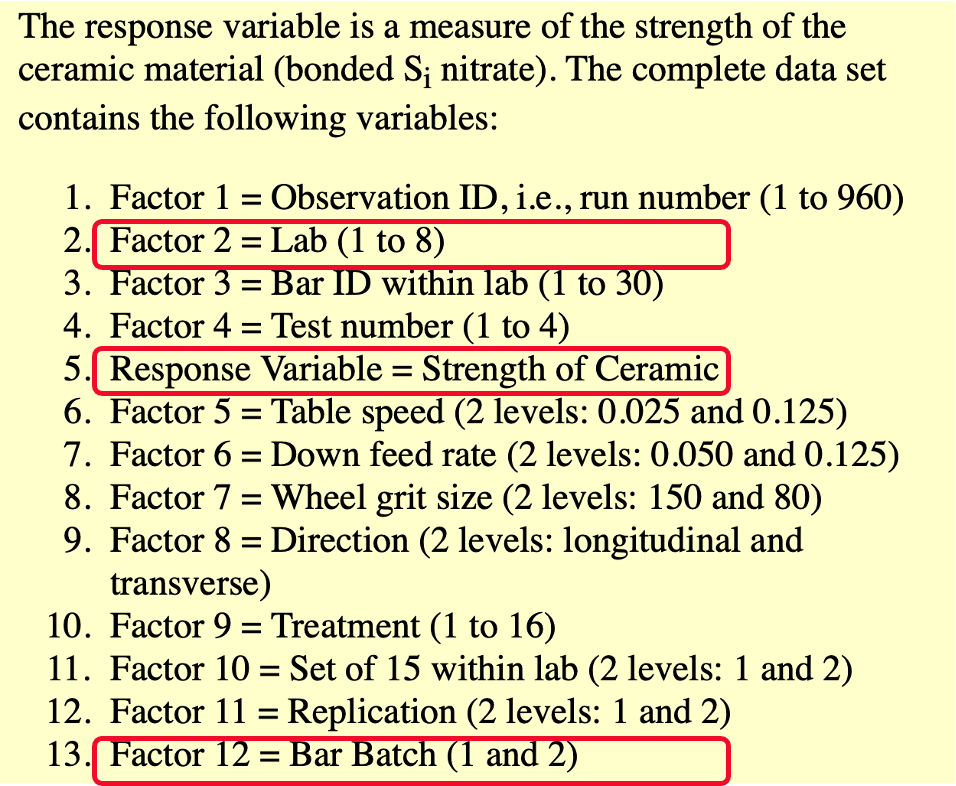




As a text file, you can open it in any text editor to look at the data file. Alternatively, you can read in the text file using the native `open` function built into Python.

In [3]:
DATA_FILE_NAME = "data/JAHANMI2.txt"

with open(DATA_FILE_NAME, 'r') as fin:
    file_contents = fin.read()
    
print("CONTENTS OF FILE\n" + "#"*80)
print(file_contents)

CONTENTS OF FILE
################################################################################
 Id Lab Num Test    Y    X1 X2 X3 X4 Trt Set Llab Rep Bat Sblab Set2
  1  1    1   1  608.781 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
  2  1    2   1  569.670 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
  3  1    3   1  689.556 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
  4  1    4   1  747.541 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
  5  1    5   1  618.134 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
  6  1    6   1  612.182 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
  7  1    7   1  680.203 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
  8  1    8   1  607.766 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
  9  1    9   1  726.232 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
 10  1   10   1  605.380 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
 11  1   11   1  518.655 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
 12  1   12   1  589.226 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
 13  1   13   1  740.447 -1 -1 -1 -1   1 

Just looking at the data file, we can make a few observations.
1. This is a **space-delimited** file.
2. Each row corresponds to a data point.
3. Each column corresponds to a variable.
4. There is a header row that contains column labels.
5. There doesn't appear to be any *missing data*.
6. Most of the descriptors appear to be categorical or discrete. A few are continuous descriptors.

The `open` file is a very generic Python function used to open any type of file, but it doesn't offer any other functionality other than loading the file contents into a Python variable. In order to extract the individual data points would require some coding to parse the string correctly.

Because loading a data file is a common task in data science, statistics, and machine learning - there are external libraries that perform this task much easier than processing the raw contents of the file. There are a few functions in both `numpy` and `pandas`. For this note, we'll explore a way to do this with `numpy`. Specifically, we'll use the `numpy.loadtxt` function:

(Documentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)

In [4]:
import numpy as np

# use the np. loadtxt function to load the data into a two-dimensional numpy array
data = np.loadtxt(DATA_FILE_NAME, skiprows=1)

# See also: np.genfromtxt (when we know there is missing data)

This loads the numeric data that is saved inside the text file. We use the `skiprows=1` argument to indicate there is 1 non-data row, primarly the header row. The function reads the text file, and puts all the numeric data into the `data` numpy array. It's a 2 dimensional array:

#### Exercise
---

1. How many rows and columns are in the data?

2. Print the first 5 rows.

3. Print the last 3 rows.

4. Repeat 2 and 3  but only print out the columns corresponding to circled columns in the above desription of the data.
---

Let's make sure that there isn't any missing data. With `numpy` data loading algorithms, missing or ill-formatted data is sometimes assigned an `NaN` (not-a-number) value. We can use the `np.isnan` function to detect this.

This returns a same matrix of the same shape and size as `data`. Each entry is either `True` or `False` depending on whether the corresponding entry in `data` is `NaN` (missing) or not. If there are any `True` values here, then `data` has missing or poorly formed data. It's kind of hard to parse through this entire matrix looking for `True`. We can ask `numpy` to look for us using the `np.any` function. This function takes a boolean matrix (e.g. the one returned by `np.isnan(data)`, and returns `True` if any of its entries are `True`. If none of its entries are `True`, it returns `False`.

This is hard to parse. Instead, lets ask Python to check all the entries at once using the `np.any` function.
Given an array of `True` and `False` values, `np.any` returns either `True` if any of the entries in the array are `True`, `False` otherwise.

#### Exercise
---
`np.any` can be pased the `axis` argument like other aggregation functions we've seen in the past. Use this to code up the following checks which can be accomplished with one or two lines.

1. Report whether there are any negative quantities for all the columns.
2. Report the rows that have some missing columns. 
---


#### Exercise
---
The column at index 4 reports the strength ($Y$) of all the material samples in the data set. Report a few summary statistics of this strength. Try reporting: the mean, median, variance and range of the strength data.

---

In [ ]:
Y = data[:, 4]



## Some basic visualizations

We can make a few basic plots to look at our data. To do that, we'll once again use the following code that is used to make some decent looking plots. The only relevant line is the first one below, which, as you recall, imports that `matplotlib.pyplot` plotting library.

In [11]:
import matplotlib.pyplot as plt

#----------- IGNORE THIS CODE BELOW ------------------#
import numpy as np
import matplotlib as mpl
from cycler import cycler
COLORS = ['#242482', '#F00D2C', '#0071BE', '#4E8F00', '#553C67', '#DA5319']
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 14
plt.rc('axes', prop_cycle=cycler(color=COLORS))
#-----------------------------------------------------#

Once we load this, we can make a few plots.

### Run Plot

One of the easiest plots we can make is a **run plot**, where we just plot $Y$ versus the experiment index.
We can use the `plt.plot` function.

In [ ]:
# Run Plot
plt.plot(Y)

# Add some grid lines
plt.grid()

# Add some labels
plt.xlabel('Experiment Number')
plt.ylabel('Strength')

Run plots can sometimes reflect some structure to how the data was entered into the data file. For example, it can reflect if there is some temporal effect if the data is sorted by time, or if there is any other order to the data.

### Histogram

Another easy plot is a histogram, which we examined in the last notebook. Histograms bins similar values of $Y$ observations, and plots a bar chart to show the frequency of similar $Y$ values in the data. To make a histogram, we can use the `plt.hist` function.


### Box Plot

Another way of visualizing summary statistics is a box plot, which we can make using the `plt.boxplot` function.

Here, the vertical axis correspond to $Y$ values. The purple line indicates the median value among the data. The rectangle shows the interval between 25% and 75% percentiles. That is, 50% of the data closest to the median is within this interval. This range is often called the **Inter-Quartile Range (IQR)**, and is typically used to identify outliers. The thin lines shows the maximum and minimum values of the $Y$ data, after removing outliers. The two dots are two outlier data points - points that are uncharacteristically small given the rest of the data.

Note that there are no large outliers - points that are uncharacteristically large.

### QQ Plots

Looking at the histogram of $Y$, we may think that the data looks like a bell curve. That is, we may think that the data has a **Normal (aka Gaussian)** distribution. We can visualize how well this appears using a **Quantile-Quantile (QQ) plot**.

To do this, we'll use another library called ``scipy``, and particular the function ``scipy.stats.probplot``, which is located in the sub-library ``scipy.stats``

In [ ]:
# Import the stats library. we won't give it an alias
from scipy import stats

# Use stats.probplot to make a QQ plot comared to the Normal/Gaussian Distribution
results = stats.probplot(Y, dist='norm', plot = plt)

If the observed distribution of the $Y$ data was really a Normal distribution, the blue dots and the red line would line up well. In fact, they do line up fairly well in the middle, but only deviate for large and small values of the observed data. This tells us that the tails (extreme values of $Y$) do not follow a normal distribution.

To see how this would look like for data that is actually coming from a normal distribution, we can generate normally distributed values below, and look at its QQ plot.

In [ ]:
rng = np.random.default_rng()
Y_norm = rng.normal(0, 1, 1000)



To see an example of data that does not come from a normal distribution, we can generate data from a Uniform distribution, and compare it to the normal distribution using a QQ plot.

This is an example of something that is definitely not close to a normal distribution.

**Why do we care?**

As we'll see later on when we start getting into Machine Learning topics, we often must have a probabilistic model for our data. In fact, many basic results depend on a specific model (say a Gaussian Model) for our data. That means that we really need to know what kind of distribution our data is coming from, and the above QQ plots are one quick way of doing this visually.

Later on, we'll see how to do this with a bit more rigor and statistical precision using Hypothesis testing. But for now, in this first, exploratory stage, having these visual confirmations of our data model can be very helpful in deciding what further tests and analyses to perform.

## Effect of Batch on Response

Now we want to understand the effect of the other variables on the response variable. For example, we can ask how changing the Batch (column 13) $B$ affects ceramic strength. This is very typical in experimental materials, in which the response may change based on different batches that you must order from a supplier.

### Scatter Plot
One of the first things we can do is to plot $B$ vs $Y$ as a scatter plot. We can use the `plt.scatter` function.

In [ ]:
# define B 
B = data[:,13]

# Scatter plot B, Y using plt.scatter
plt.scatter(B, Y)

plt.xlabel('Batch')
plt.ylabel('Strength')

This plot really doesn't tell us much, except that we observe that there are only 2 values of the Batch variable, 1 and 2. The points overlap too much for us to say anything else more meaningful.

### Conditioning on Batch Number

Let's look at the response $Y$ for the first two batches. We'll write $Y | B = 1$ to indicate the $Y$ data values corresponding to the first batch and $Y | B = 2$ for the $Y$ values corresponding to the second batch.

We wish to do this conditioning on our data set to extract the relevant sets of data. We can then perform the above analyses on the extracted data subsets. To do this, we'll take advantage of the Boolean indexing.

#### Exercise
---
Using Boolean indexing, extract the $Y$ values that correspond to $B$ values that equal 1, and those that correspond to $B$ values that equal 2.

---

In [ ]:
Y_given_B1 = ...

Y_given_B2 = ...

Once we extract the relevant subset of data, we can e.g. plot some histograms.

In [ ]:
# Plot histograms of both
plt.hist(Y_given_B1, rwidth = 0.9)
plt.hist(Y_given_B2, rwidth = 0.9)

# Add a legend
plt.legend([
    'Strength given Batch 1', 
    'Strength given Batch 2'])

# Add some labels
plt.xlabel('Strength')
plt.ylabel('Frequency')

We see that the two distributions for $Y|B=1$ and $Y|B=2$ are visually distinct, at least in where their mean or median values are. That is, the two distirbutions "peak" at different places. What about the spread, or standard deviation of the distributions? Are they similar?

### Summary statistics of conditional response

We see that the distributions are somewhat different. Let's compare their mean and standard deviations.

In [ ]:
# Y|B=1 mean and std
mean_Y_given_B1 = np.mean(Y_given_B1)
std_Y_given_B1 = np.std(Y_given_B1)
print(mean_Y_given_B1)
print(std_Y_given_B1)


# Y|B=2 mean and std
mean_Y_given_B2 = np.mean(Y_given_B2)
std_Y_given_B2 = np.std(Y_given_B2)
print(mean_Y_given_B2)
print(std_Y_given_B2)

From these quantities, we can ponder a few things about the data:
    
* Are these two distributions significantly different? 
* That is, is there a strong batch effect on the response?
* How can you be sure of your answer?

#### Exercise
---

Above, we made histogram plots for the conditional responses $Y | B=1$ and $Y | B=2$. 
* Can you repeat the other types of analyses for these conditional responses? 
* What, if anything, can you conclude from such plots?
---

## Effect of Lab

This experiment was done across 8 different labs (Column 1). How different are the results from the different labs?

We'll again use conditioning to pick out the response function values specific to particular labs. Again, we will write

$$ Y | L = i $$

to describe the response function values obtained from lab $i$.

In [ ]:
# Define L
L = data[:,1]

# Define conditionals
Y_given_L1 = Y[L == 1]

# The same for all other labs (L = 2, 3, ..., 8)
Y_given_L8 = Y[L == 8]
Y_given_L2 = Y[L == 2]
Y_given_L3 = Y[L == 3]
Y_given_L4 = Y[L == 4]
Y_given_L5 = Y[L == 5]
Y_given_L6 = Y[L == 6]
Y_given_L7 = Y[L == 7]


# Make histograms
plt.hist(Y_given_L1, rwidth = 0.9)
plt.hist(Y_given_L2, rwidth = 0.9)
plt.hist(Y_given_L3, rwidth = 0.9)
plt.hist(Y_given_L4, rwidth = 0.9)
plt.hist(Y_given_L5, rwidth = 0.9)

This way of visualizing the data is a bit problematic. First, we have manually repeated very similar code to create these histograms. We really should use some sort of loop to do this. Second, it's hard to intepret so
many histograms put on-top of each other. We need to further summarize this conditional data.

First, we'll write a for-loop to extract the relevant data.

In [ ]:
# iterate over labs, i = 1, 2, ..., 8 (but not 9)
for i in range(1, 9):
    # Form boolean index to condition on L = i
    I_given_Li = (L == i)
    
    # condition Y | L = i 
    Y_given_Li = Y[I_given_Li]
    
    # plot histogram of the conditioned random variable
    plt.hist(Y_given_Li, rwidth = 0.9)

But still, this is too much to look at! Let's try to instead summarize each histogram by  computing the mean of each of the conditional $Y$ values, and plotting the mean values for each lab, instead of the entire histogram.

In [ ]:
# allocate mean_values array to store the computed means of each conditionals
# one entry per lab (so 8 total)
mean_values_arr = np.zeros(8)

# loop over lab numbers
for i in range(1, 9):
    # Form boolean index to condition on L = i
    I_given_Li = (L == i)
    
    # condition Y | L = i 
    Y_given_Li = Y[I_given_Li]
    
    # calculate conditional mean and store it in the array
    mean_values_arr[i-1] = np.mean(Y_given_Li)
       
# plot the mean values with plt.plot (We could have also used "scatter" here)
plt.plot(mean_values_arr, linewidth=0, marker='o')
plt.xlabel('Lab number')
plt.ylabel('Mean Y conditioned on lab')

How does this variance between labs compare to the variance between batches?

#### Exercise
---
We used the mean value summary statistic to simplify the plots for different labs. What are other ways we can visualize the response value conditional on lab number?
For example, using the similar looping structure, create several box plots, each corresponding to the distribution of $Y$ given a particular lab number. Note that the `boxplot` function can handle several boxplots given to it as a list of datasets instead of just a single dataset. 

---

#### Exercise
---

Did each lab handle the different batches the same? Maybe some labs were able to eliminate the batch effect. Compare the simultaneous effect of the batch and lab by conditioning response values on a specific batch AND a specific lab. For a batch i and lab j, we'll write

$$ Y |(B = i \text{ AND } L = j) $$

for the response values corresponding to both batch i and lab j. In Python, to combine two logical indices with an ``and`` statement, you can use the numpy function ``np.logical_and`` or the `&` symbol.

---

# Dimensionality Reduction Algorithms in Python
---

We now turn our attention to dimensionality reduction algorithms and their implementation in Python. Recall, dimensionality reduction methods are useful for EDA because they enable us to visualize data in informationally-optimal subset of features. The first model we learned in class is Principal Component Analysis.

To illustrate the various algorithms, we'll use a real materials data set that list several material descriptors and whether the material described by those descriptors form a Perovskite crystal structure. This type of structure has been of general interest for quite some time now, and materials with this type of structure often have attractive electrical and magnetic properties, leading to their applications in Sensores, Electrolysis, Memory and Spintronic Devices.

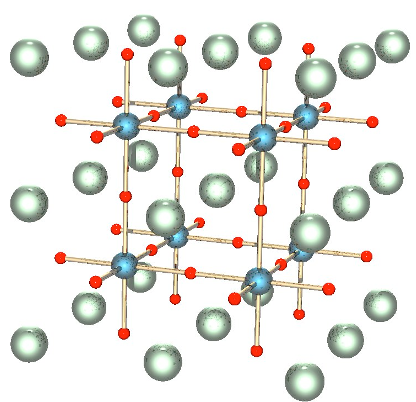


The data can be loaded from the `data/perovskite_data.txt` file. This file lists several materials, and includes a list of descriptors of those materials and a Boolean quantity (or class) of whether the material forms the Perovskite structure. Again, to load the data, we may use `np.loadtxt`.

In [9]:
data = np.loadtxt('data/perovskite_data.txt')

We would like to expore this data to see if there is any structure between the descriptors that allow us to make informed conclusions about this structure and perovskite structure. For example, we may be interested in making a prediction about whether a particular material (and its corresponding set of descriptors) will form the Perovskite structure.

As a matter of convenience, we'll extract the descriptor columns separately from the Boolean perovskite variable.

In [12]:
# Class data - whether we form Perovskite or not
y = data[:, 0]

# Extract all but the 0-th column
X = data[:, 1:]

# Map -1, 1 to color values (just to make nice looking plots)
color_seq = [ COLORS[0] if yy == -1 else COLORS[1] for yy in y]

The goal here is to find some structure in the $\boldsymbol x = (x_1, ... , x_N)$ variables that is causally related to the $y$ variable. Because the dimensionality reduction algorithms below will combine these $\boldsymbol x$ in several different ways, it is best to normalize our data. Recall from lecture, normalization of the data achieves several things include:

1. Making sure all the descriptor values are roughly the same order-of-magnitude. This helps prevent any one descriptor from having an artificially large impact on, for example, Eigenvalue or distance calculations that are often used in these and other algorithms.

2. Eliminating units, which means we can add and subtract these quantities together and have it still make sense.


To do this, for this example, we'll use $Z$- normalization, which scales the data by the sample mean and standard deviation. That is, if we look at the $j$-th descriptor, and calculate the average and standard deviation (denoted $\bar x_j, s_j$, respectively)$ we can recenter and scale according to:

$$ \tilde x_j = \frac{x_j - \mu_j}{\sigma_j.}$$

With `numpy` broadcasting, we can do this all at once.

In [13]:
X = (X - np.mean(X, axis = 0))/np.std(X, axis = 0)

With the data properly loaded and normalized, we can begin our exploration of the data.

#### Exercise
---
In addition to using the dimensionality reduction algorithms described below, explore the data manually using some of the plotting techniques above. For example, try plotting the class data, the $Y$, vs. different descriptor columns, the $X$'s.

---

## Principal Component Analysis

To start our exploration of the low-dimensional structure of the data, we'll ask whether there is low-dimensional *linear* structure using vanilla PCA. We'll do this a few different ways to illustrate a few basic concepts from Linear Algebra. At the end, we'll explore the PCA library in `sklearn` that sweeps all of this under the rug, which is good to use in practice.

## Manual SVD Calculation using `numpy.linalg.eig`

To understand what's going on under the hood, we'll explicitly calculate the singular vectors -- the "natural" basis of the data. Recall, the singluar vectors of the data matrix $X$ are the Eigenvectors of
$$C = X^T X,$$

In [14]:
# Compute SVD with eigvalue decomposition
C = X.T@X

# General eigenvector calculation
Lambda_eig, U_eig = np.linalg.eig(C)

# We just want the directions of the singular vectors, and not 
# necessarily their magnitude, so we can normalize all vectors
# to have unit length.

# Normalize columns of U_eig
U_eig = U_eig / np.linalg.norm(U_eig, axis=1)

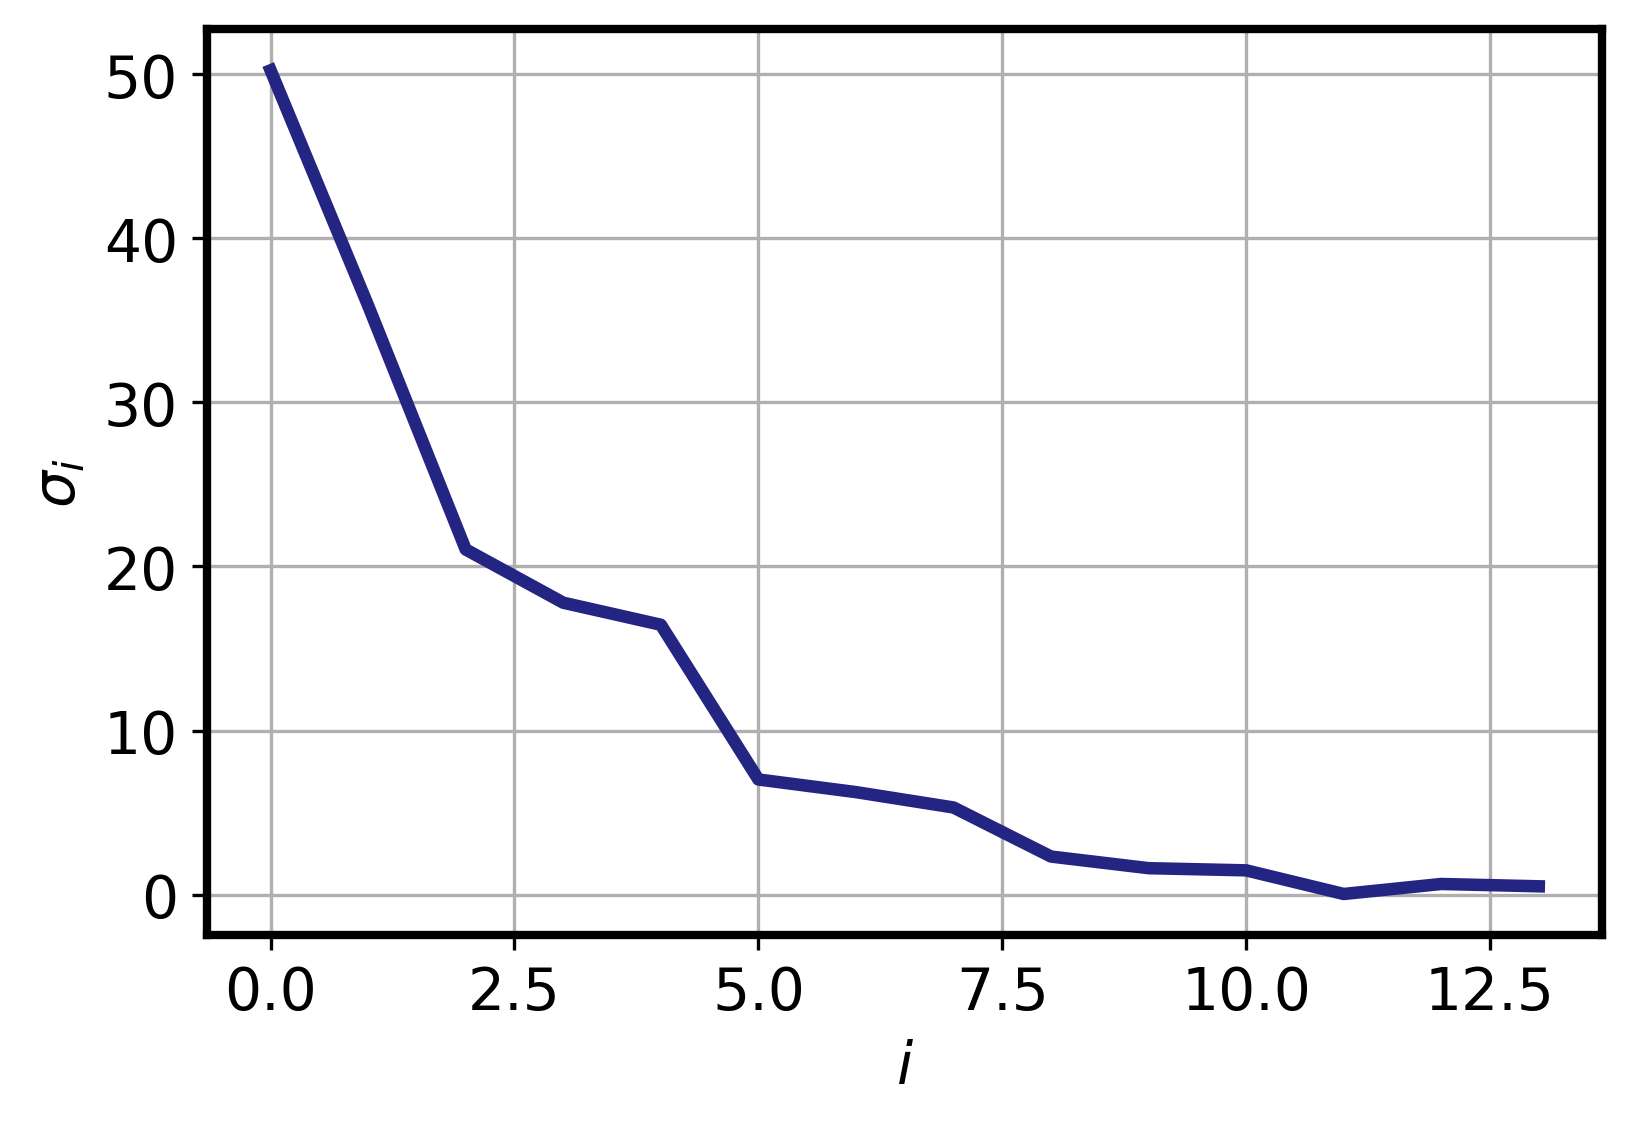

In [15]:
# Plot singular values
Sigma_eig = np.sqrt(Lambda_eig)
plt.plot(Sigma_eig)
plt.xlabel('$i$')
plt.ylabel('$\sigma_i$')
plt.grid()

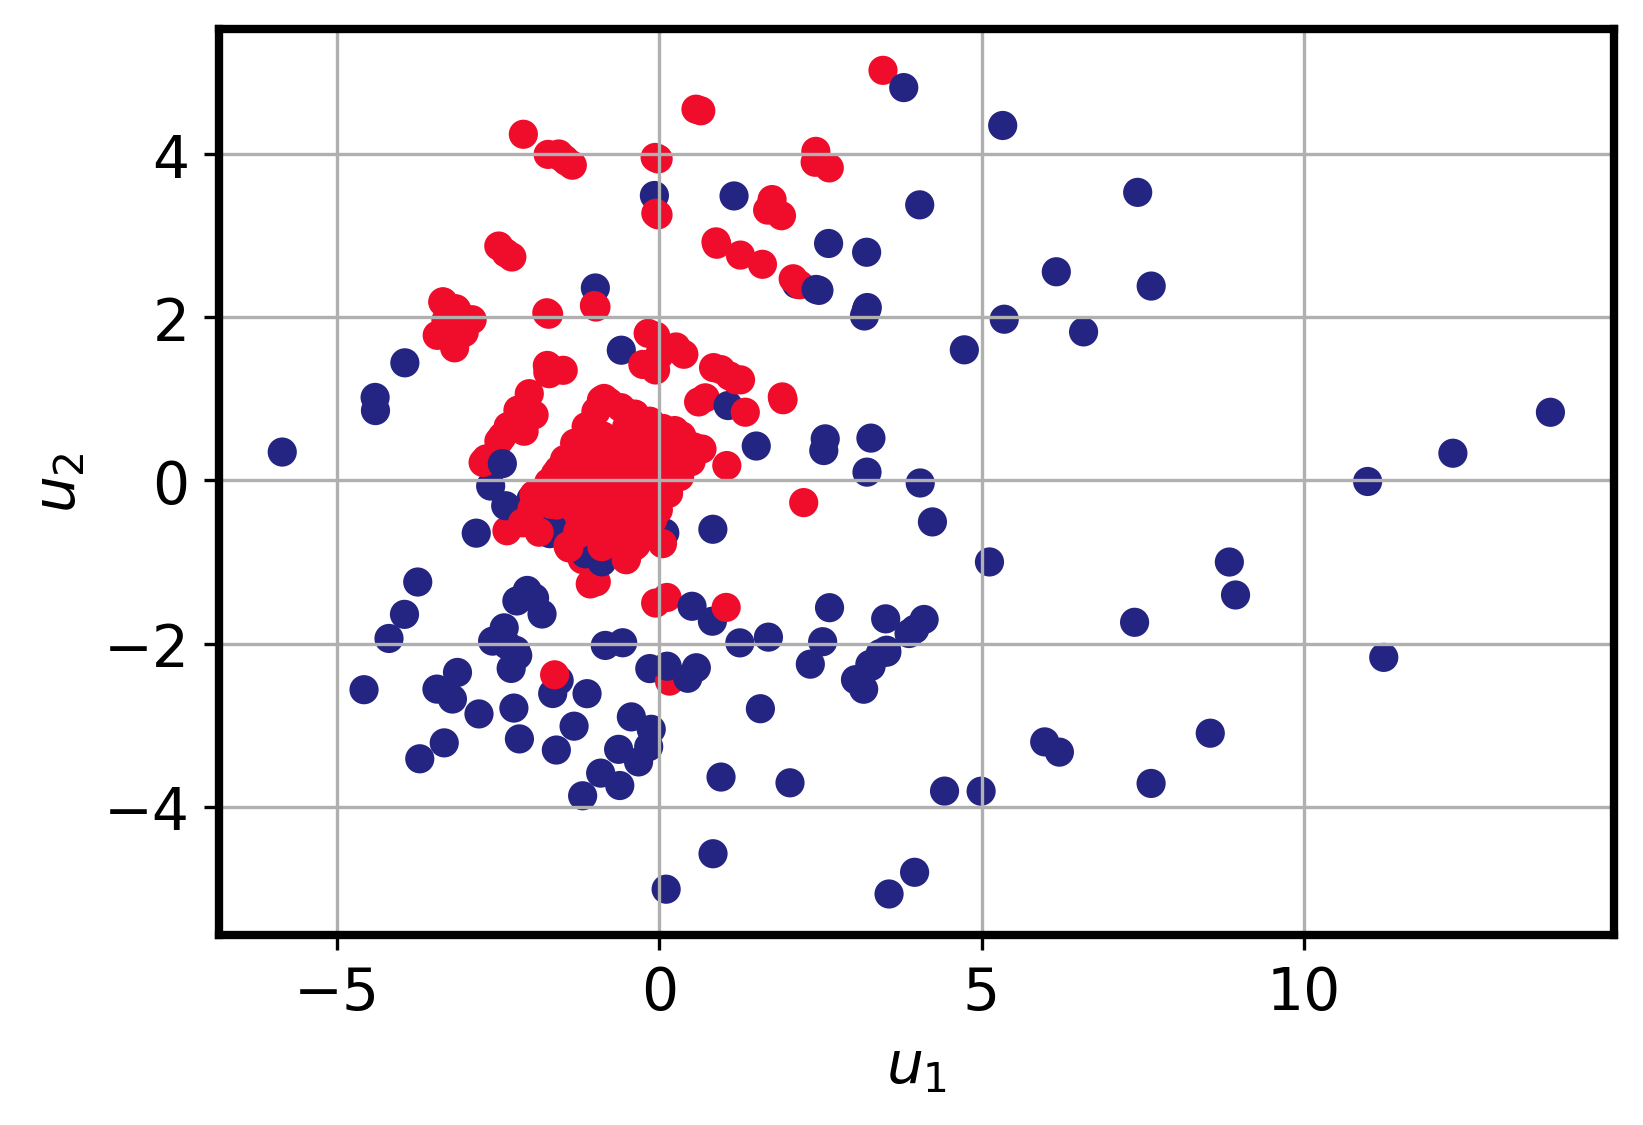

In [16]:
# Let's project our data onto the first largest two singular values
X_proj_EIG = X@U_eig

# Plot first two components
plt.scatter(X_proj_EIG[:, 0], X_proj_EIG[:, 1], c=color_seq)
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.grid()

## SVD calculation using `numpy.linalg.svd`

Rather than explicitly forming the covariance matrix and calculating its Eigenvalues and Eigenvectors (i.e. the singular values and vectors of the original matrix), we can more directly calculate the Singluar Value decomposition using `numpy`

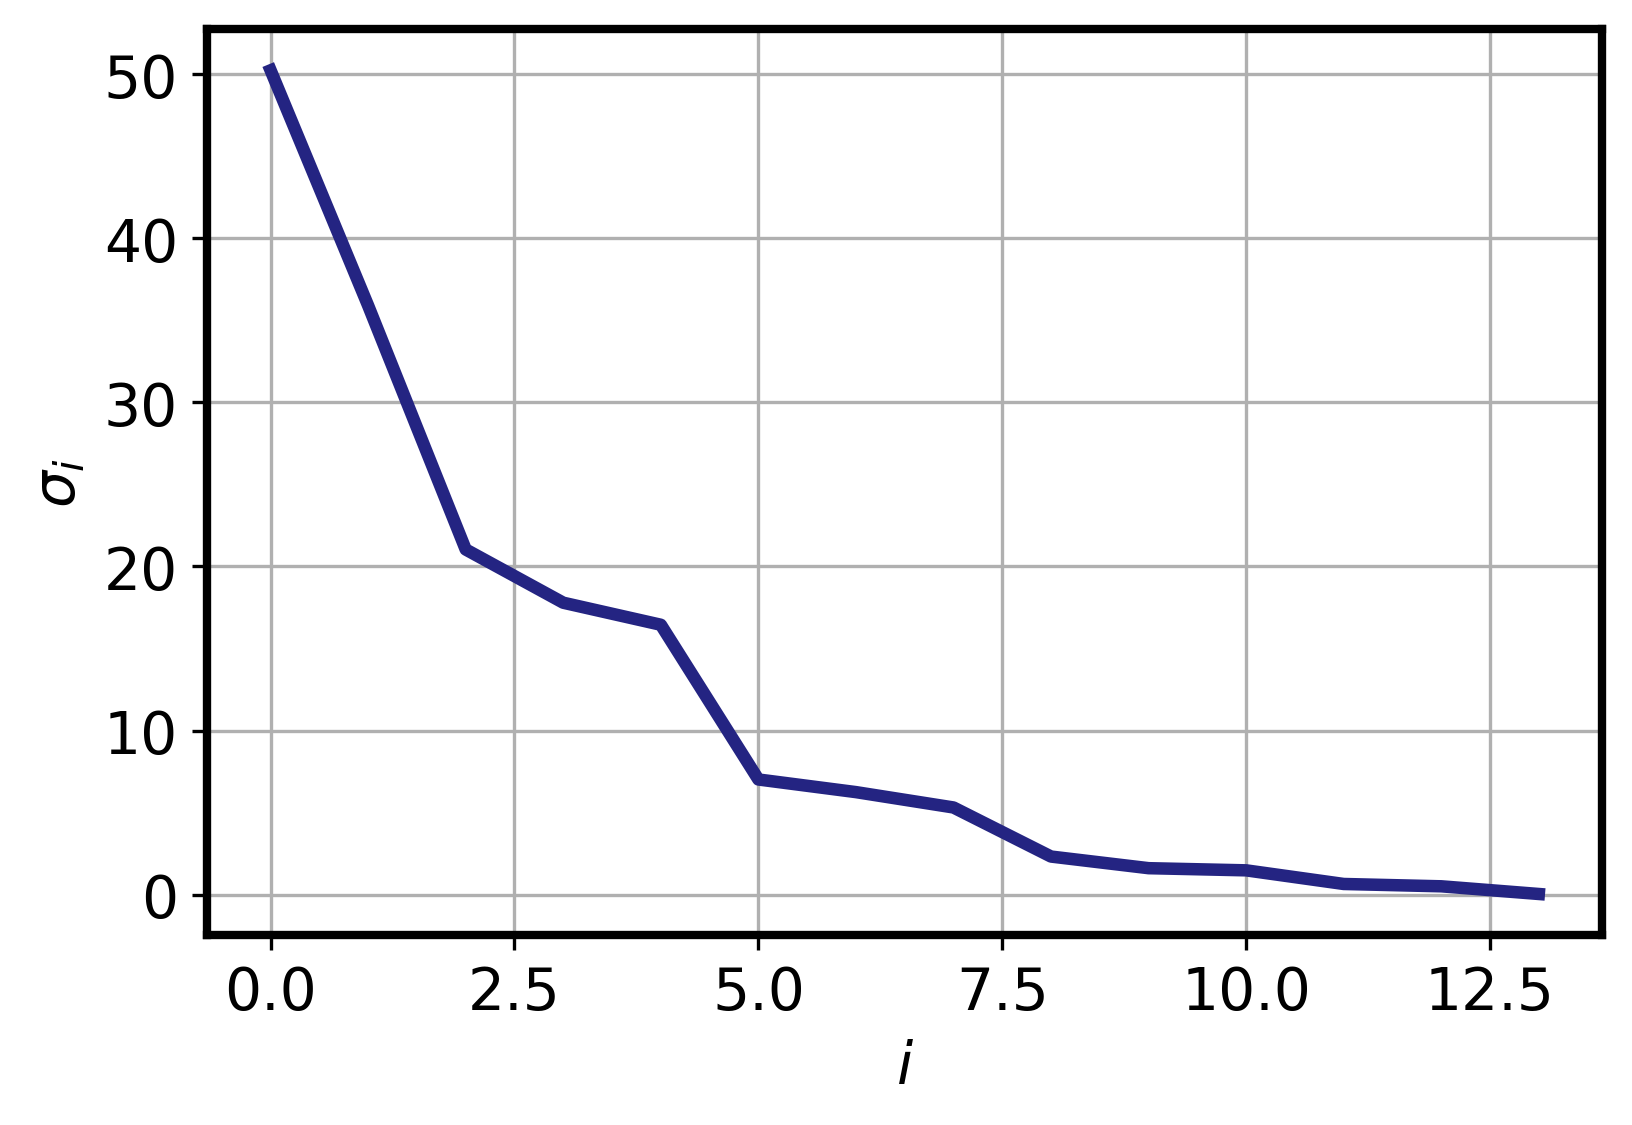

In [17]:
# use numpy's SVD library:
U, Sigma_np, VT = np.linalg.svd(X, compute_uv=True)

# Plot singular values
plt.plot(Sigma_np)
plt.xlabel('$i$')
plt.ylabel('$\sigma_i$')
plt.grid()

(14, 14)

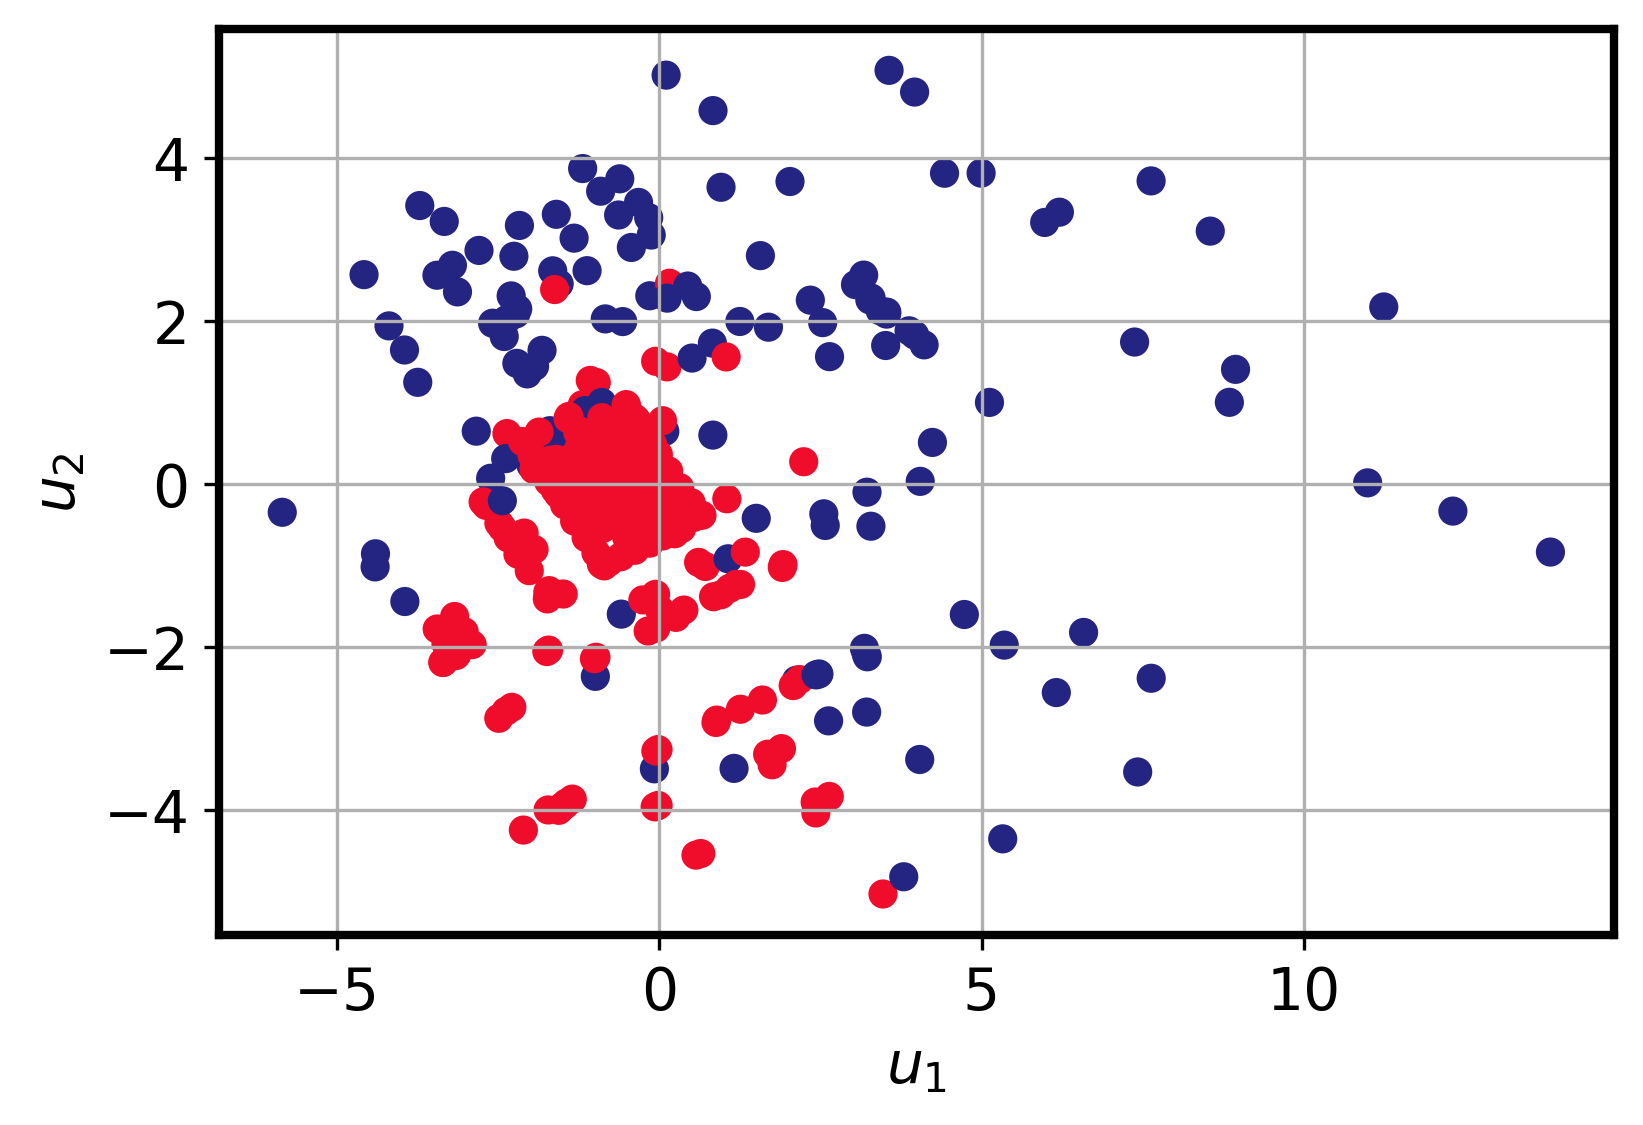

In [24]:
# Let's project our data onto the first two singular values
X_proj_SVD = X@VT.T

# Plot first two components
plt.scatter(X_proj_SVD[:, 0], X_proj_SVD[:, 1], c=color_seq)
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.grid()

## Using `sklearn`

We now turn our attention to the PCA implementation in Scikit-Learn, or `sklearn` for short. `sklearn` is a library with several machine learning algorithms models built in. The use of these models has been fairly standardized throughout all of `sklearn`, and follow a common pattern:

1. We instantiate a model, perhaps specifying a few hyperparameters to describe how to train that model when we give it data.

2. We call the `.fit` function attached to that model. This will train the model.

3. We call the a prediction `.predict` or transformation function `.transform` on some more data to apply the model to that data. 


In [ ]:
# Use Scikit learn's PCA library
from sklearn.decomposition import PCA

# Create a pca model "object"
pca = PCA(n_components=10)

# Train the model to the data
pca.fit(X)

# Do the dimensionality reduction
X_proj_PCA = pca.transform(X)

# Get singular values
Sigma_PCA = pca.singular_values_ 
plt.plot(Sigma_PCA)
plt.xlabel('$i$')
plt.ylabel('$\sigma_i$')
plt.grid()

In [ ]:
plt.scatter(X_proj_PCA[:, 0], X_proj_PCA[:, 1], c=color_seq)
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.grid()

## Kernel PCA

In addition to ordinarly linear PCA, we can use the kernalized version of PCA, which pre-transforms the descriptors using basis functions. This results in a high-dimensional representation of the data, which we then use normal PCA to project down to a lower dimensional subspace. The hope is that by using non-linear basis functions, we can "linearize" the data inside the higher dimensional space.

By applying the kernel trick, we don't have to explicitly give basis functions. Instead, we prescribe a Kernel function meant to represent the dot product of the high-dimensional transformations of two descriptor vectors. Below, we'll use the RBF / squared expontential basis functions:

$$ K(\boldsymbol x, \boldsymbol x^\prime) = \exp[-\|\

In [ ]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(n_components=2, kernel='rbf')
pca.fit(X)
Z = pca.transform(X)

color_seq = [ COLORS[0] if yy == -1 else COLORS[1] for yy in y]

plt.scatter(Z[:, 0], Z[:, 1], c = color_seq)

# Non-linear Manifold Learning

When your data lies in some low-dimensional surface inside its ambient space, but that surface is not linear (i.e. "flat"), then methods like PCA fail to find this low dimensionality of your data.

We have to turn to dimensionality reduction methods for non-flat structures -- this is called **Manifold Learning**.

The `sklearn` library has many manifold learning methods available. For details see:

https://scikit-learn.org/stable/modules/manifold.html

To illustrate the various methods, we'll load the "swiss roll" data set, which is data points lying inside a 3 dimensional space, but really essentially lying on a 2 dimensional surface of that space. 

In [ ]:
# Generate some nonlinear data
from sklearn import datasets

# Make 3d plots
from mpl_toolkits.mplot3d import Axes3D

NUM_POINTS = 1000
X, color = datasets.make_swiss_roll(NUM_POINTS)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = color)
ax.view_init(4, -72)

We'd like the dimeninsionality reduction to "capture" this in 2D euclidean space -- i.e. the plane. That is, we're looking for dimensionality reduction algorithms to "unwrap" this and preserve structure as much as possible.

## Linear projections

We'll try some linear projections, which won't be that great because the surface is non-linear. First, we'll just map to the $XY$ plane by forgetting each points' $Z$ coordinate.

In [ ]:
# Plot projetion onto plane z = 0
plt.scatter(X[:,0], X[:,1], c=color)

Now we'll try using PCA, again a linear projection (this time on the plane defined by the first 2 singular vectors).

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
Z = pca.transform(X)

plt.scatter(Z[:, 0], Z[:, 1], c=color)

## Kernel PCA

Recall the central idea of kernel PCA is to secretly define a high  non-linear transformation $\phi(\mathbf x)$ - with the hope that that transformation makes the dimensionality reduction easier. In `scikit-learn`, we can use the `KernelPCA` model to do this, and specify what kernel to use.



In [ ]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(n_components=2, kernel='poly')
pca.fit(X)
Z = pca.transform(X)

plt.scatter(Z[:, 0], Z[:, 1], c=color)

## Isomap
Recall that Isomap works by trying to fit the points in a low dimensional Euclidean space so that geodesic distance is preserved to the best of our abilities. It approximates the geodesic distance by making a graph of points.
The Isomap model in scikit-learn does this for your. Among other things, you must specify the number of neighbors in the graph that is built from the points (in n_neighbors) as well as the assumed dimension of the manifold (in n_components).

In [ ]:
from sklearn.manifold import Isomap

model = Isomap(n_neighbors = 10, n_components = 2)
model.fit(X)
Z = model.transform(X)

plt.scatter(Z[:, 0], Z[:, 1], c=color)

## Local Linear Embedding

Documentation:
    
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

model = LocallyLinearEmbedding(n_neighbors = 10, n_components = 2)
model.fit(X)
Z = model.transform(X)

plt.scatter(Z[:, 0], Z[:, 1], c=color)

## Other manifold learning models in `sklearn`

* Laplacian Eignemaps / Spectral Embedding `sklearn.manifold.SpectralEmbedding`
* Multidimensional Scaling (MDS) `sklearn.manifold.MDS`
* t-distributed Stochastic Neighbor Embedding (TSNE) `sklearn.manifold.TSNE`

